# Cleaning and Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import copy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t


################################################################# Data Dictionary For Housing Data


housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [81]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [82]:
housing.head()

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


# Reading in Real Estate Data

In [83]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

# Dealing with Nulls

In [122]:
data = housing.copy()

nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,0,0,0,462,0,0,2412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,14,0,0,0,69,69,71,69,1,70,1,1,1,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1241,127,129,129,1,1,129,129,0,0,0,0,0,0,0,2571,2055,2483,0,0,0,0,0


In [123]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature"] # columns with too many nulls

data = data.drop(high_null_cols,axis = 1)


nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts = nan_counts.iloc[:,[i for i,j in enumerate(nan_counts.loc[0].to_list()) if j != 0]]

nan_counts

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,462,14,14,69,69,71,69,1,70,1,1,1,1,2,2,127,129,129,1,1,129,129


In [124]:
data = data.drop('LotFrontage',axis = 1)

### Rows in train and test sets that could contain a null

In [125]:
len(data.loc[data.isna().any(axis = 1)]),len(data)

(204, 2580)

### Not that many rows contain nulls is either set so we'll just drop them for simplicity 

In [126]:
data_nulls = data.loc[data.isna().any(axis = 1)]
print(data_nulls.index)
data = data.drop(data_nulls.index,axis = 0)
data.loc[data.isna().any(axis = 1)]

Int64Index([   5,   17,   22,   44,   48,   50,   54,   60,   93,   96,
            ...
            2464, 2465, 2477, 2481, 2488, 2513, 2536, 2540, 2546, 2576],
           dtype='int64', length=204)


,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


# Categoricals

In [127]:
dc = ghd()
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,0]

'BsmtExposure'

In [128]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,1]

' Refers to walkout or garden level walls'

In [129]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]

['Gd     Good Exposure',
 'Av     Average Exposure (split levels or foyers typically score average or above)',
 'Mn     Mimimum Exposure',
 'No     No Exposure',
 'NA     No Basement']

In [130]:
[s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]],[4,3,2,1,0]))
print(set(data.loc[:,'BsmtCond']))
print(im)
data.loc[:,'BsmtExposure'] = data['BsmtExposure'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtExposure']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
{1, 2, 3, 4}


In [131]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,0]

'BsmtCond'

In [132]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,1]

' Evaluates the general condition of the basement'

In [133]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical - slight dampness allowed',
 'Fa     Fair - dampness or some cracking or settling',
 'Po     Poor - Severe cracking, settling, or wetness',
 'NA     No Basement']

In [134]:
im = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
print(set(data.loc[:,'BsmtCond']))
data.loc[:,'BsmtCond'] = data['BsmtCond'].apply(lambda x:im[x])
print(im)
print(set(data.loc[:,'BsmtCond']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
{2, 3, 4, 5}


In [135]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,0]

'BsmtFinType1'

In [136]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,1]

' Rating of basement finished area'

In [137]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]

['GLQ    Good Living Quarters',
 'ALQ    Average Living Quarters',
 'BLQ    Below Average Living Quarters',
 'Rec    Average Rec Room',
 'LwQ    Low Quality',
 'Unf    Unfinshed',
 'NA     No Basement']

In [138]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtCond']))
print(im)
data.loc[:,'BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType1']))

{2, 3, 4, 5}
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3, 4, 5, 6}


In [139]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,0]

'BsmtFinType2'

In [140]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,1]

' Rating of basement finished area (if multiple types)'

In [141]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]

['GLQ    Good Living Quarters',
 'ALQ    Average Living Quarters',
 'BLQ    Below Average Living Quarters',
 'Rec    Average Rec Room',
 'LwQ    Low Quality',
 'Unf    Unfinshed',
 'NA     No Basement']

In [142]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtFinType2']))
print(im)
data.loc[:,'BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType2']))

{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{'BLQ', 'ALQ', 'GLQ', 'Rec', 'Unf', 'LwQ'}
{1, 2, 3, 4, 5, 6}


In [143]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,0]

'BsmtQual'

In [144]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,1]

' Evaluates the height of the basement'

In [145]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]

['Ex     Excellent (100+ inches)',
 'Gd     Good (90-99 inches)',
 'TA     Typical (80-89 inches)',
 'Fa     Fair (70-79 inches)',
 'Po     Poor (<70 inches',
 'NA     No Basement']

In [146]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtQual']))
print(im)
data.loc[:,'BsmtQual'] = data['BsmtQual'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [147]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,0]

'CentralAir'

In [148]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,1]

' Central air conditioning'

In [149]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]

['N      No', 'Y      Yes']

In [150]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]],[0,1]))
print(set(data.loc[:,'CentralAir']))
print(im)
data.loc[:,'CentralAir'] = data['CentralAir'].apply(lambda x:im[x])
print(set(data.loc[:,'CentralAir']))

{'N', 'Y'}
{'N': 0, 'Y': 1}
{0, 1}


In [151]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,0]

'ExterCond'

In [152]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,1]

' Evaluates the present condition of the material on the exterior'

In [153]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [154]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterCond']))
print(im)
data.loc[:,'ExterCond'] = data['ExterCond'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [155]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,0]

'ExterQual'

In [156]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,1]

' Evaluates the quality of the material on the exterior'

In [157]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [158]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterQual']))
print(im)
data.loc[:,'ExterQual'] = data['ExterQual'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterQual']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{2, 3, 4, 5}


In [45]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,0]

'Functional'

In [46]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,1]

' Home functionality (Assume typical unless deductions are warranted)'

In [47]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]

['Typ    Typical Functionality',
 'Min1   Minor Deductions 1',
 'Min2   Minor Deductions 2',
 'Mod    Moderate Deductions',
 'Maj1   Major Deductions 1',
 'Maj2   Major Deductions 2',
 'Sev    Severely Damaged',
 'Sal    Salvage only']

In [159]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]],[8,7,6,5,4,3,2,1]))
print(set(data.loc[:,'Functional']))
print(im)
data.loc[:,'Functional'] = data['Functional'].apply(lambda x:im[x])
print(set(data.loc[:,'Functional']))

{'Min2', 'Maj2', 'Min1', 'Sal', 'Maj1', 'Typ', 'Mod'}
{'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
{1, 3, 4, 5, 6, 7, 8}


In [160]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,0]

'GarageCond'

In [161]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,1]

' Garage condition'

In [162]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor',
 'NA     No Garage']

In [163]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageCond']))
print(im)
data.loc[:,'GarageCond'] = data['GarageCond'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [164]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,0]

'GarageFinish'

In [165]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,1]

' Interior finish of the garage'

In [166]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]

['Fin    Finished',
 'RFn    Rough Finished',
 'Unf    Unfinished',
 'NA     No Garage']

In [167]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]],[3,2,1,0]))
print(set(data.loc[:,'GarageFinish']))
print(im)
data.loc[:,'GarageFinish'] = data['GarageFinish'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageFinish']))

{'Unf', 'Fin', 'RFn'}
{'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3}


In [168]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,0]

'GarageQual'

In [169]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,1]

' Garage quality'

In [170]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor',
 'NA     No Garage']

In [171]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageQual']))
print(im)
data.loc[:,'GarageQual'] = data['GarageQual'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [172]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,0]

'KitchenQual'

In [173]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,1]

' Kitchen quality'

In [174]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Typical/Average',
 'Fa     Fair',
 'Po     Poor']

In [175]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]],[5,4,3,2,1]))
print(set(data.loc[:,'KitchenQual']))
print(im)
data.loc[:,'KitchenQual'] = data['KitchenQual'].apply(lambda x:im[x])
print(set(data.loc[:,'KitchenQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [176]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,0]

'LandSlope'

In [177]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,1]

' Slope of property'

In [178]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]

['Gtl    Gentle slope', 'Mod    Moderate Slope', 'Sev    Severe Slope']

In [179]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]],[1,2,3]))
print(set(data.loc[:,'LandSlope']))
print(im)
data.loc[:,'LandSlope'] = data['LandSlope'].apply(lambda x:im[x])
print(set(data.loc[:,'LandSlope']))

{'Sev', 'Mod', 'Gtl'}
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
{1, 2, 3}


In [180]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,0]

'LotShape'

In [181]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,1]

' General shape of property'

In [182]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]

['Reg    Regular',
 'IR1    Slightly irregular',
 'IR2    Moderately Irregular',
 'IR3    Irregular']

In [183]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]],[0,1,2,3]))
print(set(data.loc[:,'LotShape']))
print(im)
data.loc[:,'LotShape'] = data['LotShape'].apply(lambda x:im[x])
print(set(data.loc[:,'LotShape']))

{'IR2', 'IR3', 'IR1', 'Reg'}
{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
{0, 1, 2, 3}


In [184]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,0]

'MSSubClass'

In [185]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,1]

' Identifies the type of dwelling involved in the sale.'

In [186]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]

['20    1-STORY 1946 & NEWER ALL STYLES',
 '30    1-STORY 1945 & OLDER',
 '40    1-STORY W/FINISHED ATTIC ALL AGES',
 '45    1-1/2 STORY - UNFINISHED ALL AGES',
 '50    1-1/2 STORY FINISHED ALL AGES',
 '60    2-STORY 1946 & NEWER',
 '70    2-STORY 1945 & OLDER',
 '75    2-1/2 STORY ALL AGES',
 '80    SPLIT OR MULTI-LEVEL',
 '85    SPLIT FOYER',
 '90    DUPLEX - ALL STYLES AND AGES',
 '120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '150    1-1/2 STORY PUD - ALL AGES',
 '160    2-STORY PUD - 1946 & NEWER',
 '180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '190    2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [187]:
desc = dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]
desc = [i[i.find('    '):].strip() for i in desc]
print(desc)
im = dict(zip([int(s[0:s.find(' ')]) for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]],desc))
print(set(data.loc[:,'MSSubClass']))
print(im)
data.loc[:,'MSSubClass'] = data['MSSubClass'].apply(lambda x:im[x])
print(set(data.loc[:,'MSSubClass']))

['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']
{160, 70, 40, 75, 45, 190, 80, 50, 20, 180, 85, 150, 120, 90, 60, 30}
{20: '1-STORY 1946 & NEWER ALL STYLES', 30: '1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES', 45: '1-1/2 STORY - UNFINISHED ALL AGES', 50: '1-1/2 STORY FINISHED ALL AGES', 60: '2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER', 75: '2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER', 90: 'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

In [188]:
data.head()

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,1-STORY 1945 & OLDER,RL,7890,Pave,0,Lvl,AllPub,Corner,1,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,1,3,238.0,1,0.0,618.0,856.0,GasA,TA,1,SBrkr,856,0,0,1.0,0.0,1,0,2,1,3,4,8,1,Detchd,1939.0,1,2.0,399.0,3,3,Y,0,0,0,0,166,0,0,3,2010,WD,Normal
1,905476230,1049,139500,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,4235,Pave,0,Lvl,AllPub,Inside,1,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4,3,2,6,552.0,5,393.0,104.0,1049.0,GasA,TA,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,4,5,8,0,Attchd,1984.0,3,1.0,266.0,3,3,Y,0,105,0,0,0,0,0,2,2009,WD,Normal
2,911128020,1001,124900,1-STORY 1945 & OLDER,C (all),6060,Pave,0,Lvl,AllPub,Inside,1,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3,3,1,5,737.0,1,0.0,100.0,837.0,GasA,Ex,1,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,4,5,8,0,Detchd,1930.0,1,1.0,216.0,3,1,N,154,0,42,86,0,0,0,11,2007,WD,Normal
3,535377150,1039,114000,2-STORY 1945 & OLDER,RL,8146,Pave,0,Lvl,AllPub,Corner,1,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,4,4,BrkTil,2,3,1,1,0.0,1,0.0,405.0,405.0,GasA,Gd,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,3,6,8,0,Detchd,1940.0,1,1.0,281.0,3,3,N,0,0,168,0,111,0,0,5,2009,WD,Normal
4,534177230,1665,227000,2-STORY 1946 & NEWER,RL,8400,Pave,0,Lvl,AllPub,Inside,1,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,6,643.0,1,0.0,167.0,810.0,GasA,Ex,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,4,6,8,0,Attchd,2001.0,3,2.0,528.0,3,3,Y,0,45,0,0,0,0,0,11,2009,WD,Normal


**Making Dummy Variables**

In [191]:
dumb_data = pd.get_dummies(data)
dumb_data = pd.merge(dumb_data,data[['MapRefNo','Neighborhood']],how = 'right',on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_data.pop('Neighborhood')
dumb_data.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column

In [192]:
dumb_data.head()

,MapRefNo,Neighborhood,GrLivArea,SalePrice,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca

# Lasso for Feature Selection on Dummified Set

In [195]:
from sklearn.linear_model import Lasso,Ridge,LassoLarsIC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [196]:
data_corr = pd.DataFrame(dumb_data.corr())

In [294]:
dumb_corrs = data_corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T


tr = dumb_data.copy()




train_features = tr.drop(['MapRefNo','SalePrice','Neighborhood'], axis = 1)
train_target = tr['SalePrice']


scaler = StandardScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)


lasso = Lasso()

alpha_range = np.linspace(0,1000,1000)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores = []

for alpha in alpha_range:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_features_scaled,train_target)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(train_features_scaled,train_target))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alpha_range, columns = train_features.columns)  
score_lasso = pd.DataFrame({'R^2':scores},index = alpha_range)

fig = px.line(score_lasso,x = score_lasso.index,
              y = score_lasso['R^2'],title = "Lasso R^2 vs. Lambda",
              range_x=(0,1000),height = 500,width = 500)
fig.show()

# Visualizing coeficients of dummy subgroups vs. normalization factor lambda

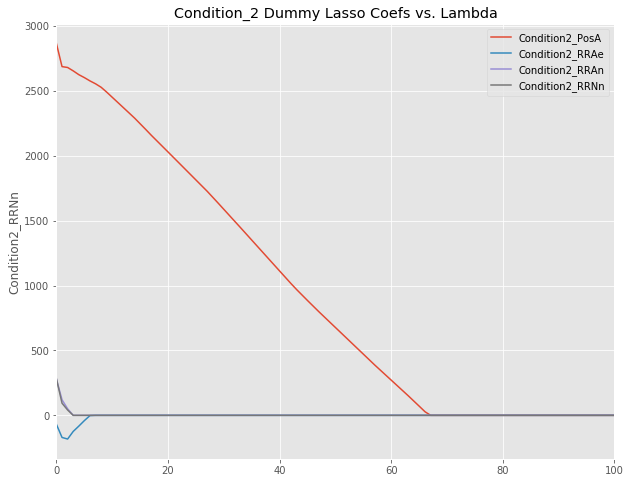

In [290]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sns.lineplot(x = coefs_lasso.index,y = 'Condition2_PosA',data = coefs_lasso,label = 'Condition2_PosA')
sns.lineplot(x = coefs_lasso.index,y = 'Condition2_RRAe',data = coefs_lasso, label = 'Condition2_RRAe')
sns.lineplot(x = coefs_lasso.index,y = 'Condition2_RRAn',data = coefs_lasso, label = 'Condition2_RRAn')
sns.lineplot(x = coefs_lasso.index,y = 'Condition2_RRNn',data = coefs_lasso, label = 'Condition2_RRNn')
plt.xlim(0,100)
plt.title("Condition_2 Dummy Lasso Coefs vs. Lambda")
plt.legend()
plt.show()

In [272]:
#list(coefs_lasso.columns)

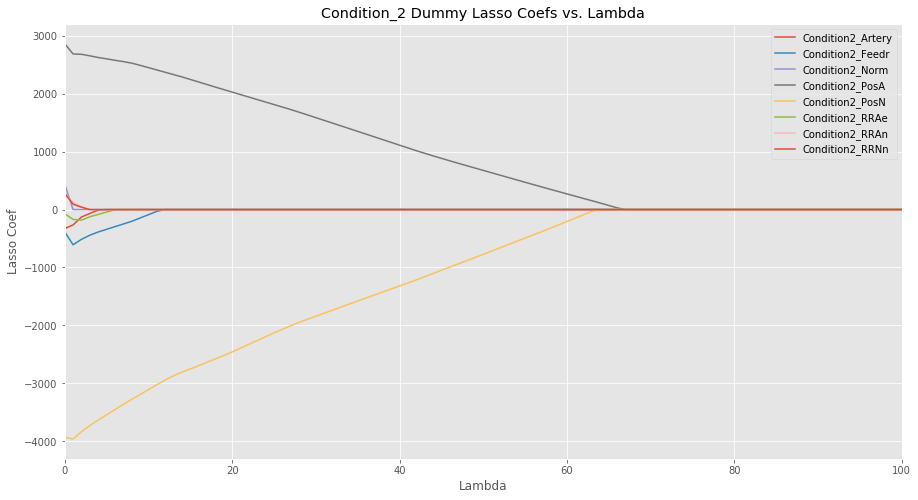

In [289]:
Condition_2_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'Condition2_Artery'):\
                                                list(coefs_lasso.columns).index( 'Condition2_RRNn' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Condition_2_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Condition_2_dummies[i],data = coefs_lasso,label = Condition_2_dummies[i])

plt.xlim(0,100)
plt.title("Condition_2 Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

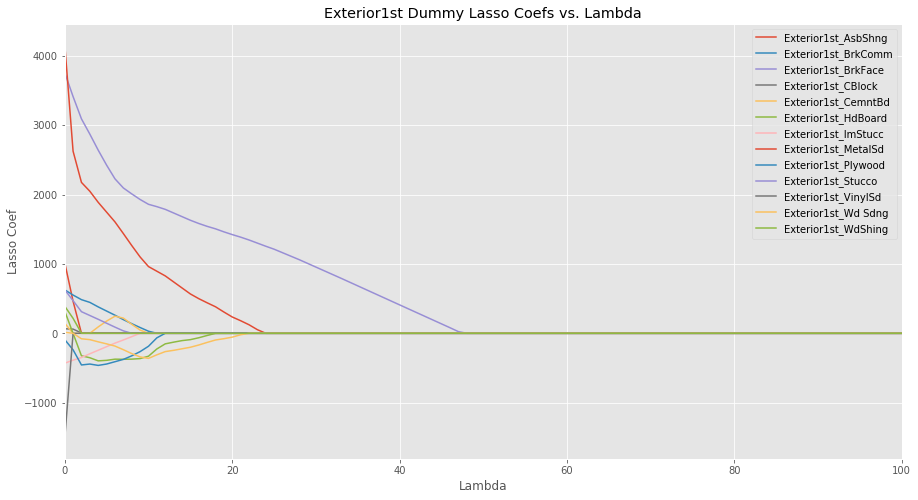

In [288]:
Exterior1st_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Exterior1st_AsbShng' ):\
                                                list(coefs_lasso.columns).index( 'Exterior1st_WdShing' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Exterior1st_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Exterior1st_dummies[i],data = coefs_lasso,label = Exterior1st_dummies[i])

plt.xlim(0,100)
plt.title("Exterior1st Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

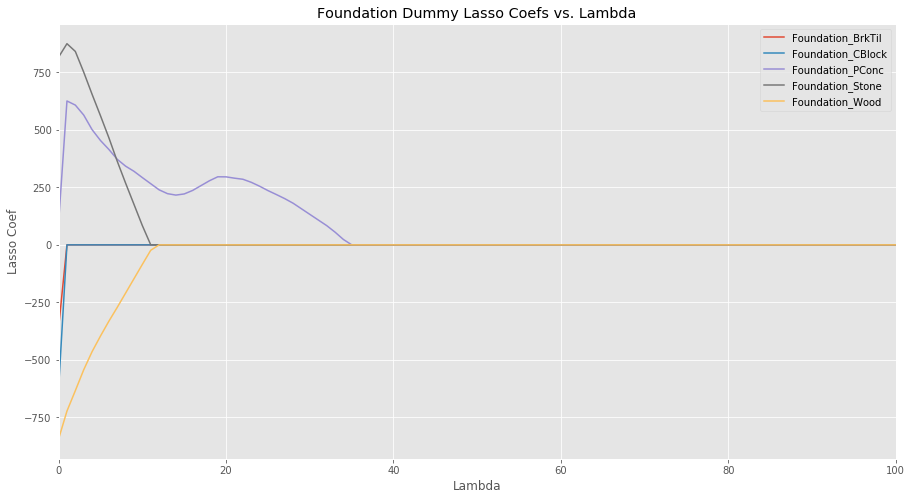

In [287]:
Foundation_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Foundation_BrkTil'):\
                                                list(coefs_lasso.columns).index('Foundation_Wood')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Foundation_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Foundation_dummies[i],data = coefs_lasso,label = Foundation_dummies[i])

plt.xlim(0,100)
plt.title("Foundation Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

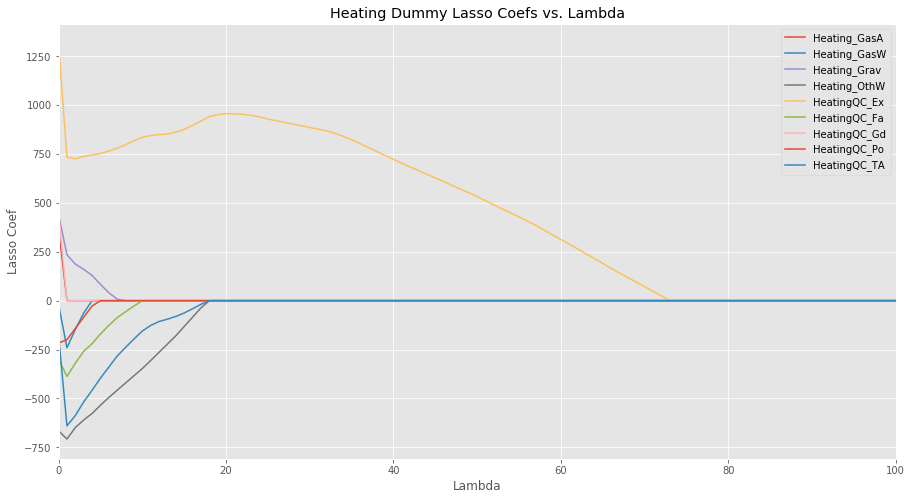

In [286]:
Heating_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Heating_GasA'):\
                                                list(coefs_lasso.columns).index('HeatingQC_TA')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Heating_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Heating_dummies[i],data = coefs_lasso,label = Heating_dummies[i])

plt.xlim(0,100)
plt.title("Heating Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

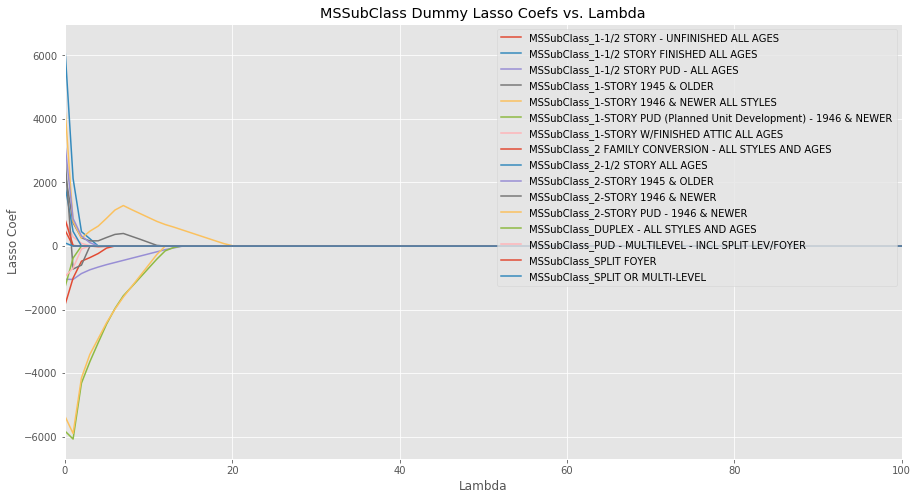

In [285]:
MSSubClass_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES'):\
                                                list(coefs_lasso.columns).index('MSSubClass_SPLIT OR MULTI-LEVEL')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSSubClass_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSSubClass_dummies[i],data = coefs_lasso,label = MSSubClass_dummies[i])

plt.xlim(0,100)
plt.title("MSSubClass Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

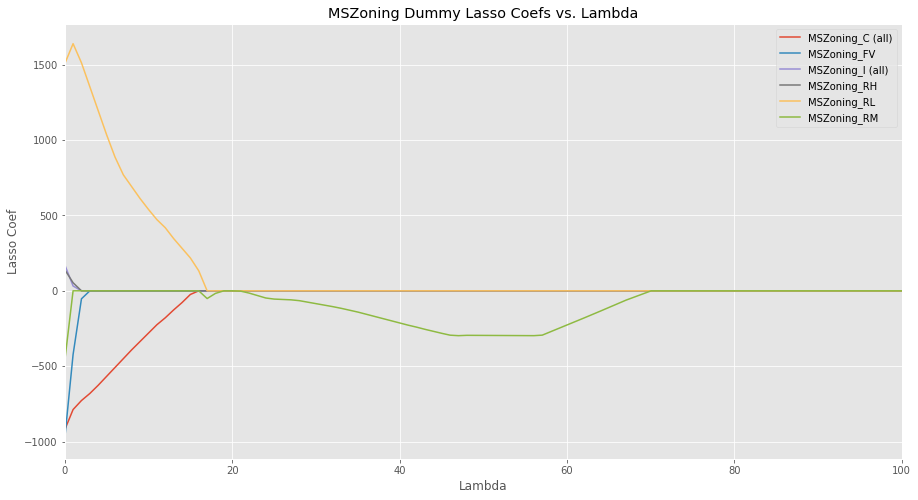

In [284]:
MSZoning_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSZoning_C (all)'):\
                                                list(coefs_lasso.columns).index('MSZoning_RM')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSZoning_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSZoning_dummies[i],data = coefs_lasso,label = MSZoning_dummies[i])

plt.xlim(0,100)
plt.title("MSZoning Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

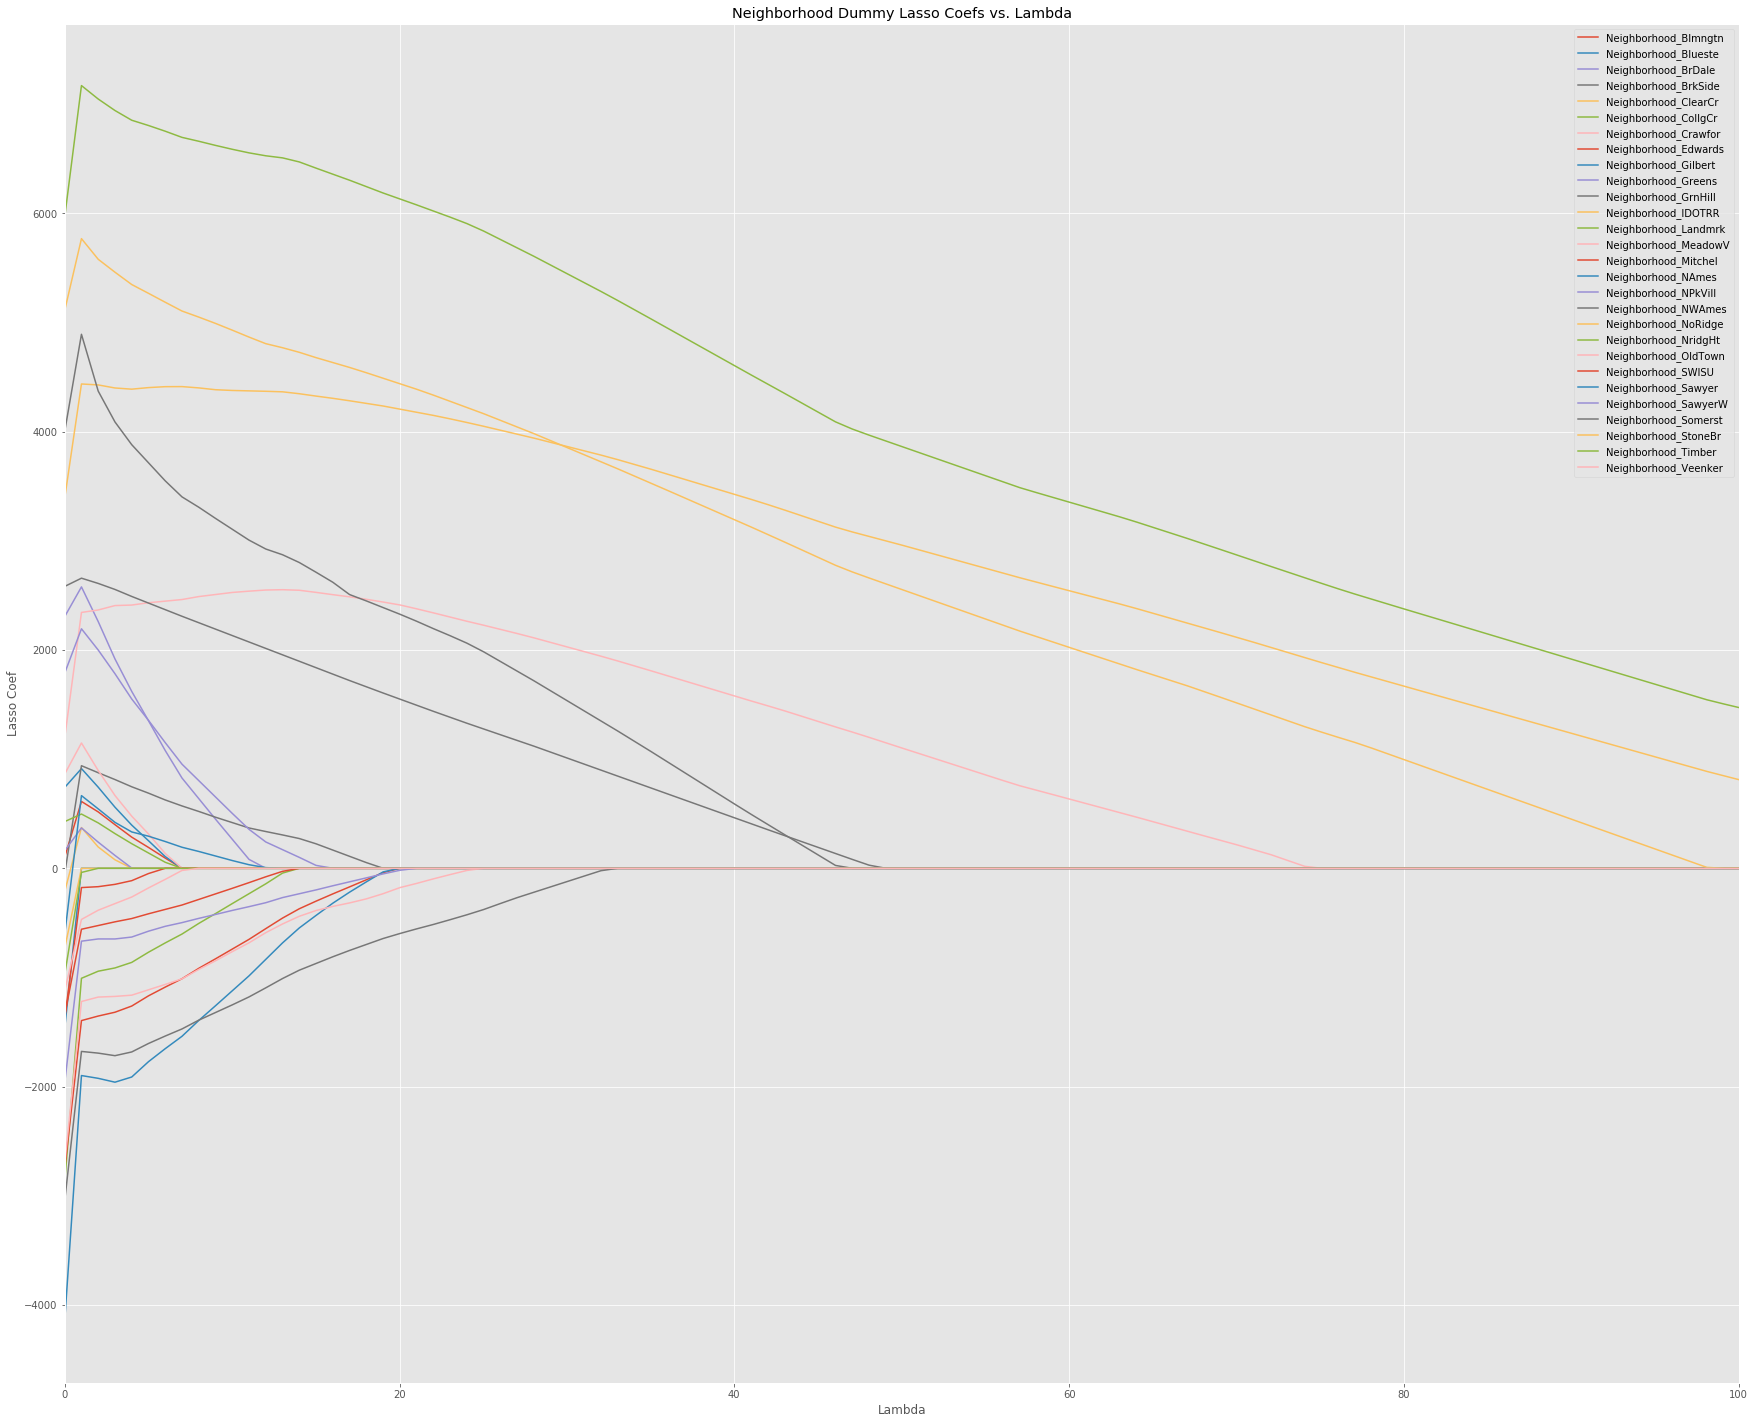

In [283]:
Neighborhood_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Neighborhood_Blmngtn'):\
                                                list(coefs_lasso.columns).index('Neighborhood_Veenker')+1]

fig,ax = plt.subplots()
fig.set_size_inches(30,25)

for i in range(len(Neighborhood_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Neighborhood_dummies[i],data = coefs_lasso,label = Neighborhood_dummies[i])

plt.xlim(0,100)
plt.title("Neighborhood Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

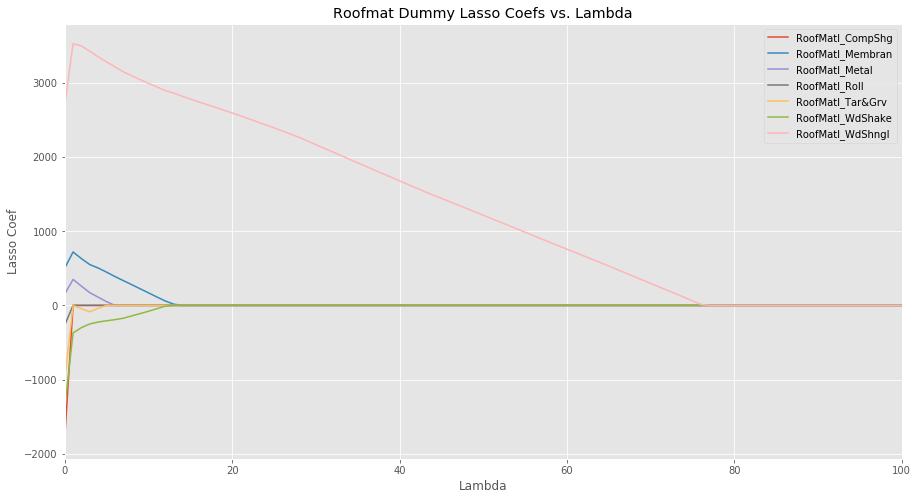

In [293]:
Roofmat_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('RoofMatl_CompShg'):\
                                                list(coefs_lasso.columns).index('RoofMatl_WdShngl')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Roofmat_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Roofmat_dummies[i],data = coefs_lasso,label = Roofmat_dummies[i])

plt.xlim(0,100)
plt.title("Roofmat Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

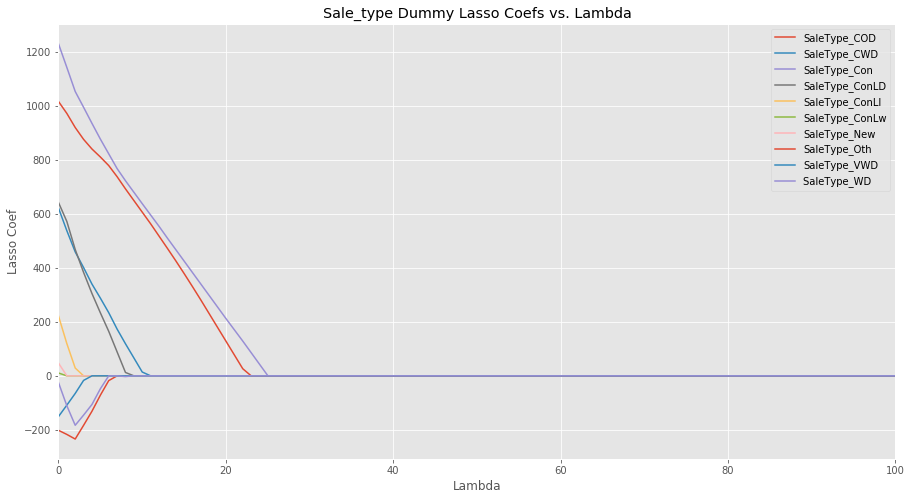

In [292]:
Sale_type_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('SaleType_COD'):\
                                                list(coefs_lasso.columns).index('SaleType_WD ')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Sale_type_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Sale_type_dummies[i],data = coefs_lasso,label = Sale_type_dummies[i])

plt.xlim(0,100)
plt.title("Sale_type Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

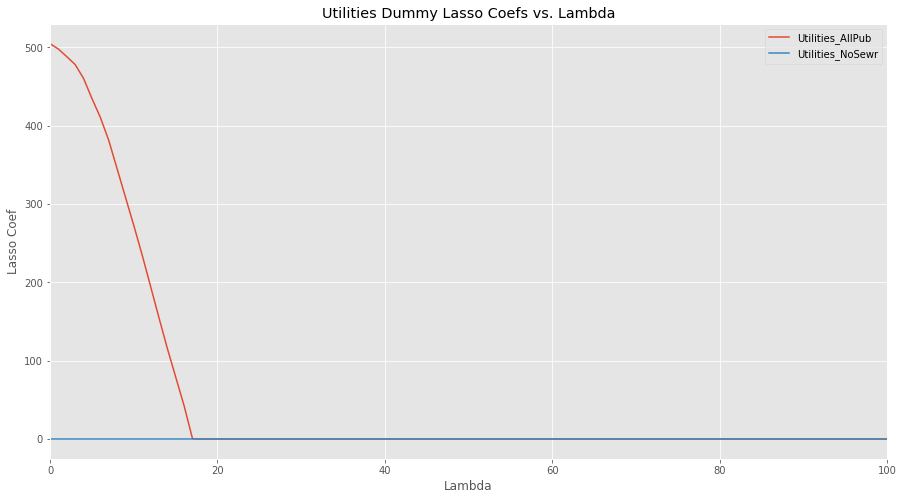

In [291]:
Utilities_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Utilities_AllPub'):\
                                              list(coefs_lasso.columns).index('Utilities_NoSewr')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Utilities_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Utilities_dummies[i],data = coefs_lasso,label = Utilities_dummies[i])

plt.xlim(0,100)
plt.title("Utilities Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()